In [1]:
from mdagent import MDAgent
import os

In [2]:
descriptive_prompt_9 = "Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Tell me how many residues are in the chains and beta sheets. 3. Find any known binding or active sites. 4. Simulate for 1 ps at 300 K. 5. Compute the RMSD of the simulation at 300 K. 6. Compute the radius of gyration over time for the simulation at 300 K. 7. Simulate for 1 ps at 400 K. 8. Compute the RMSD of the simulation at 400 K. 9. Compute the radius of gyration over time for the simulation at 400 K." 
non_descriptive_prompt_9 = "Simulate 1LYZ for 1 ps at 300K and 400K. Tell me how many residues are in the chains and beta sheets and any known binding or active sites. Compute RMSD and radius of gyration of both simulations."

In [3]:
llm_model = "claude-3-5-sonnet-20241022"
tools = "all"

In [4]:
#todays date and time
import datetime
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date: 2025-01-16
time: 11:22:30


# descriptive prompt

In [5]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)

In [6]:
agent_1.run(descriptive_prompt_9)

Thought: Let's solve this step by step. First, let's download the PDB file 1LYZ.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that we have downloaded the PDB file, let's analyze its structure and find information about residues, beta sheets, and binding/active sites. I'll use GetTurnsBetaSheetsHelices first, but I need the UniProt ID.

Action:
```
{
    "action": "MapProteinRepresentation",
    "action_input": "1LYZ"
}
```

Thought: I notice that the MapProteinRepresentation didn't return results. Let's try a different approach by first analyzing the structure directly using SummarizeProteinStructure, and then we'll use ComputeDSSP to get information about secondary structure.

Action:
```
{
    "action": "SummarizeProteinStructure",
    "action_input": {
        "traj_file": "1LYZ_112235",
        "top_file": "1LYZ_112235"
    }
}
```

Thought: Let me continue with the analysis. Now that we know the 

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

Thought: Now that

 we have the PDB file, let's analyze

 its structure to get information about resi

dues, chains, and beta sheets

.

Action:
```
{
    

"action": "ComputeD

SSP",
    "action_input":

 {
        "traj_file": "1L

YZ_161724",
        "top

_file": "1LYZ_161

724",
        "target

_frames": "all"
    }


}
```



I

'll continue from where we left off.

 Let's now look for

 binding and active sites.

Action:
```


{
    "action": "Get

UniprotID",


    "action_input": {


        "query": "1LY

Z",
        "all

_ids": false
    }
}


```



Thought

: Now that we have the Uni

Prot ID, let's get

 information about both binding and active sites.



Action:
```


{
    "action": "GetAll

KnownSites",
    "

action_input": {
        "query

": "1LYZ",


        "primary_accession": "P17

897"
    }
}
```

Thought: Now let's set up an

d run the first simulation at 300K

 for 1 ps.

Action:
```


{
    "action": "Set

UpandRunFunction",
    "action

_input": {
        "p

db_id": "1LY

Z_161724",
        

"forcefield_files

": ["amber14-all.xml

", "amber14/tip3pf

b.xml"],


        "system_params": {
            "

nonbondedMethod": "PM

E",
            "nonbondedC

utoff": "1.0 *

 nanometers",
            "constraints": "

HBonds",
            "rig

idWater": true,


            "constraintTolerance":

 0.000001,
            "

ewaldErrorTolerance

": 0.0005

,
            "s

olvate": true


        },
        "

integrator_params": {
            

"integrator_type": "L

angevinMid

dle",
            "Temperature

": "300 * kelvin

",
            "

Friction": "1.

0 / picoseconds",


            "Timestep": "0

.002 * picoseconds",
            

"Pressure": "1.

0 * bar"
        },
        

"simulation_params": {
            "

Ensemble": "NPT",
            "

Number of Steps": 500

,
            "record_interval_

steps": 5,
            "recor

d_params": ["step", "pot

entialEnergy", "temperature

"]
        }
    }
}
```

Building system...


About to create system...
Attempts at creating system: 0/3
Error adding solvent ValueError – No template found for residue 1 (LYS).  The set of atoms is similar to HID, but it is missing 8 atoms.  For more information, see https://github.com/openmm/openmm/wiki/Frequently-Asked-Questions#template
Residue code: LYS
Residue code not in solvent list. Adding forcefield                         not supported.


Thought: I see the issue. We need to clean

 the PDB file first to

 add missing atoms before running

 the simulation. Let's 

do that.

Action:
```


{
    "action": "Clean

ingToolFunction",
    "action

_input": {
        "pdb_

id": "1LYZ_161724

",
        "replace

_nonstandard_residues

": true,
        "ad

d_missing_atoms": true,
        "

remove_heterogens": true,


        "remove_water": true,


        "add_hydrogens": true

,
        "add_hydro

gens_ph": 7.0


    }
}
```



file path: /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_79/pdb/1LYZ_raw_20250110_161724.pdb


Thought: Now that we have

 a cleaned PDB file,

 let's try running the simulation at

 300K again

.

Action:


```
{
    

"action": "Set

UpandRunFunction",


    "action_

input": {
        

"pdb_i

d": "1LYZ_161746",


        "forcefiel

d_files": ["amber

14-all.xml", "amber14/

tip3pfb.

xml"],
        "system_params": {


            "nonbondedMethod": "

PME",
            "nonbonde

dCutoff": "1.0 *

 nanometers",
            "constraints": "

HBonds",
            "rigidW

ater": true,
            "constraintT

olerance": 0.000001,


            "ewaldErrorTolerance": 

0.0005,
            "solv

ate": true
        },
        "integ

rator_params": {
            "integrator

_type": "LangevinMiddle

",
            "Temperature": "300 *

 kelvin",
            "Friction": "

1.0 / picoseconds",


            "Timestep": "0.002

 * picoseconds",
            "

Pressure": "1.0 * bar"


        },
        "simulation_params":

 {
            "Ensemble": "NPT

",
            "Number of Steps": 500

,
            "record_interval_steps":

 5,
            "record_params":

 ["step", "potentialEnergy", "

temperature"]
        }


    }
}
```



Building system...


About to create system...
Attempts at creating system: 0/3


System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2b41695dc1e0> >
Setting up integrator...
Creating simulation...
simulation set!
Performing energy minimization...


Minimization complete!


Initial Positions saved to initial_positions.pdb
Equilibrating...


Simulating...


Done!
Constraints must be set to 'None' for LangevinMiddle integrator.
LangevinMiddle constraints:  HBonds
Standalone simulation script written to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_79/simulations/NPT_1LYZ_161746_20250110_161751.py
['run_robustness.sh', 'slurm-27720900.out', 'prompt7.ipynb', 'prompt1.ipynb', 'prompt3.ipynb', '.ipynb_checkpoints', 'TRAJ_sim0_161751_1LYZ_161746_20250110_161756.dcd', 'submit_robustness.sh', 'prompt10.ipynb', 'prompt9.ipynb', 'LOG_sim0_154855_1LYZ_154850_20250110_154855.txt', 'submit_2.sh', 'prompt2.ipynb', 'TOP_sim0_154855_1LYZ_154850_20250110_154855.pdb', 'out', 'prompt8.ipynb', 'LOG_sim0_161751_1LYZ_161746_20250110_161756.txt', 'prompt6.ipynb', 'TOP_sim0_161751_1LYZ_161746_20250110_161756.pdb', 'prompt4.ipynb', 'TRAJ_sim0_154855_1LYZ_154850_20250110_154855.dcd', 'prompt5.ipynb']


Thought: Let's continue with computing

 the RMSD for the 

300K simulation.

Action:
```


{
    "action": "Comput

eRMSD",
    "action

_input": {
        "top

_id": "top_sim0_161751",


        "traj_id": "rec

0_161756",
        "select

": "protein"
    }
}


```



Calculating RMSD...
Data saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_79/records/rmsd_161751.csv


Plot saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_79/figures/FIG_rmsd_161751_20250110_163237.png


I

'll continue helping you work through the

 tasks. Let's compute the radius

 of gyration for the 300K simulation next

.

Action:
```
{
    

"action": "Radiusof

GyrationPlot",
    "action

_input": {
        "t

raj_file": "rec0_161

756",
        "top_file": "

top_sim0_161751"


    }
}
```



plot_name:  FIG_rgy_rec0_161756_20250110_163242.png
plot_path /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_79/figures/FIG_rgy_rec0_161756_20250110_163242


Thought

: Let's now run the simulation at 400

K.

Action:
```


{
    "action": "SetUp

andRunFunction",
    "action_input

": {
        "pdb_id":

 "1LYZ_161746",


        "forcefield_files": ["amber14

-all.xml", "amber14/tip

3pfb.xml"],
        "system

_params": {
            "nonbon

dedMethod": "PME",
            "

nonbondedCutoff": "1

.0 * nanometers",
            

"constraints": "HBonds",
            

"rigidWater": true,
            

"constraintTolerance": 0.

000001,
            "ewaldErrorT

olerance": 0.0005,


            "solvate": true
        },


        "integrator_params": {


            "integrator_type": "Lan

gevinMiddle",
            "Temperature":

 "400 * kelvin",
            "

Friction": "1.0 / pic

oseconds",
            "Timestep":

 "0.002 

* picoseconds",
            "Pressure

": "1.0 * bar"


        },
        "

simulation_params": {
            "Ensemble

": "NPT",


            "Number of Steps": 500,


            "record_interval_steps": 

5,
            "

record_params": ["step", "potential

Energy", "temperature"]
        }


    }
}
```



Building system...


About to create system...
Attempts at creating system: 0/3


System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2b416c9422e0> >
Setting up integrator...
Creating simulation...


simulation set!
Performing energy minimization...


Minimization complete!


Initial Positions saved to initial_positions.pdb
Equilibrating...


Simulating...


Done!
Constraints must be set to 'None' for LangevinMiddle integrator.
LangevinMiddle constraints:  HBonds
Standalone simulation script written to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_79/simulations/NPT_1LYZ_161746_20250110_163246.py
['TOP_sim0_163246_1LYZ_161746_20250110_163252.pdb', 'run_robustness.sh', 'slurm-27720900.out', 'prompt7.ipynb', 'prompt1.ipynb', 'prompt3.ipynb', '.ipynb_checkpoints', 'TRAJ_sim0_163246_1LYZ_161746_20250110_163252.dcd', 'submit_robustness.sh', 'prompt10.ipynb', 'prompt9.ipynb', 'LOG_sim0_154855_1LYZ_154850_20250110_154855.txt', 'LOG_sim0_163246_1LYZ_161746_20250110_163252.txt', 'submit_2.sh', 'prompt2.ipynb', 'TOP_sim0_154855_1LYZ_154850_20250110_154855.pdb', 'out', 'prompt8.ipynb', 'prompt6.ipynb', 'prompt4.ipynb', 'TRAJ_sim0_154855_1LYZ_154850_20250110_154855.dcd', 'prompt5.ipynb']


Thought

: Let's compute the RMSD for

 the 400K simulation.

Action:


```
{
    "action": "Com

puteRMSD",
    "action

_input": {
        "top_i

d": "top_sim0_163246",


        "traj_id": "rec

0_163252",
        "select":

 "protein"
    

}
}
```



Calculating RMSD...
Data saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_79/records/rmsd_163246.csv
Plot saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_79/figures/FIG_rmsd_163246_20250110_164809.png


Thought

: Let's compute the final radius

 of gyration for the 400K simulation an

d then provide a comprehensive final answer

 with all the results.

Action:
```


{
    "action": "RadiusofGyrationPlot

",
    "action_input": {


        "traj_file": "rec0

_163252",
        "top_file

": "top_sim0_163246"


    }
}
```

plot_name:  FIG_rgy_rec0_163252_20250110_164814.png
plot_path /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_79/figures/FIG_rgy_rec0_163252_20250110_164814


Thought

: Now I have all the information

 needed to provide a comprehensive final

 answer covering all tasks.



Action:
```
{


    "action": "Final

 Answer",
    "action

_input": "I have completed all requeste

d tasks. Here are the results:

1

. PDB file 1LYZ was

 successfully downloaded and cleaned for

 simulation.

2. Structure Analysis

:
   - Total residues in

 helix: 50
   - Total resi

dues in beta strands: 14


   - Total resi

dues in coil: 65


   - Non

-protein residues: 101



3. Known Sites

:
   - Active Sites

: Found at residues 53

 and 71
   - Binding

 Sites: No known binding sites were

 found
   - Evidence

 for active sites comes from

 PROSITE-ProRule (

PRU00680)



4-6. 

300K Simulation Results:
   - Successfully

 ran 1 ps simulation at

 300K
   

- RMSD was calculate

d and plotted (saved as fig0_163

237)
   - Radius of gyration

 was calculated and plotte

d over time (saved as fig

0_163242)

7-9.

 400K Simulation Results:
   -

 Successfully ran 1 ps simulation at 400

K
   - RMSD was calculated an

d plotted (saved as fig0_164809

)
   - Radius of gyration was

 calculated and plotted over time (saved as fig

0_164814)

Both

 simulations were performed under NPT ensemble conditions

 with:
- PME for non

bonded interactions
- 

1.0 nm non

bonded cutoff
- H

Bonds constraints
- 2 fs timestep


- Langevin middle integrator


- 1.0 bar pressure

All

 simulation trajectories, state logs, and analysis

 plots have been saved and are

 available for further analysis."
}


```



({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [7]:
registry = agent_1.path_registry
print("ckpt_dir:",os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

ckpt_dir: ckpt_98
Files found in registry: 1LYZ_112235: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_112235
 rec0_112244: dssp values for trajectory with id: 1LYZ_112235
 1LYZ_112256: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_112301: Initial positions for simulation sim0_112301
 sim0_112301: Basic Simulation of Protein 1LYZ_112256
 rec0_112304: Simulation trajectory for protein 1LYZ_112256 and simulation sim0_112301
 rec1_112304: Simulation state log for protein 1LYZ_112256 and simulation sim0_112301
 rec2_112304: Simulation pdb frames for protein 1LYZ_112256 and simulation sim0_112301
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_112625: RMSD plot for 1LYZ
 rgy_rec0_112304: Radii of gyration per frame for rec0_112304
 fig0_112629: Plot of radii of gyration over time for rec0_112304
 top_sim0_112635: Initial positions for simulation sim0_112635
 sim0_112635: Bas

In [8]:
import re
import os
matches = re.findall(r"rec0_\d+", paths_and_descriptions)
traj_id1 = matches[1]
traj_id2 = matches[2]
traj_path1 = registry.get_mapped_path(traj_id1)
traj_path2 = registry.get_mapped_path(traj_id2)
assert os.path.exists(traj_path1)
assert os.path.exists(traj_path2)

matches = re.findall(r"top_sim0_\d+", paths_and_descriptions)
top_id1 = matches[0]
top_id2 = matches[1]
top_path1 = registry.get_mapped_path(top_id1)
top_path2 = registry.get_mapped_path(top_id2)
assert os.path.exists(top_path1)
assert os.path.exists(top_path2)
print(f"It's asserted that file paths for {traj_id1}, {top_id1}, {traj_id2} and {top_id2} exist")

It's asserted that file paths for rec0_112304, top_sim0_112301, rec0_112304 and top_sim0_112635 exist


In [9]:
# this checks DSSP for the first frame, change to the last frame if needed
import mdtraj as md

print("From first simulation:")
traj_path1 = registry.get_mapped_path(traj_id1)
top_path1 = registry.get_mapped_path(top_id1)
traj = md.load(traj_path1, top=top_path1)[0] # first frame
secondary_structure = md.compute_dssp(traj,simplified=True)[0]
print("Number of residues in total: ",traj.n_residues)
print("Number of chains: ",traj.n_chains)
print("Number of residues in sheets: ",len([i for i in secondary_structure if i == 'E']))
print("Number of residues in helices: ",len([i for i in secondary_structure if i == 'H']))
print("Number of residues in coils: ",len([i for i in secondary_structure if i == 'C']))

From first simulation:
Number of residues in total:  6919
Number of chains:  3
Number of residues in sheets:  14
Number of residues in helices:  53
Number of residues in coils:  62


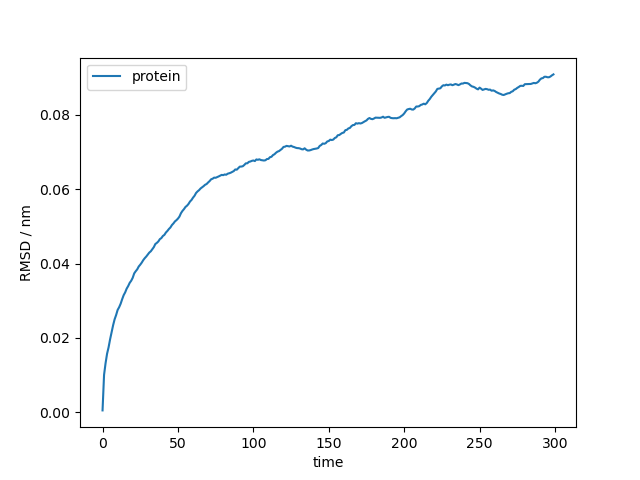

In [10]:
from IPython.display import Image
matches = re.findall(r"fig0_\d+", paths_and_descriptions)
fig_id1 = matches[0]
fig_path1 = registry.get_mapped_path(fig_id1)
assert os.path.exists(fig_path1), f"This figure {fig_id1} does not exist."
Image(filename=fig_path1)

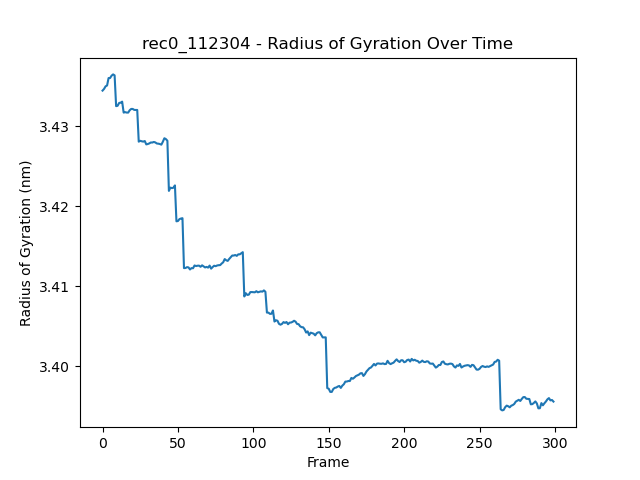

In [11]:
fig_id2 = matches[1]
fig_path2 = registry.get_mapped_path(fig_id2)
assert os.path.exists(fig_path1), f"This figure {fig_id2} does not exist."
Image(filename=fig_path2)

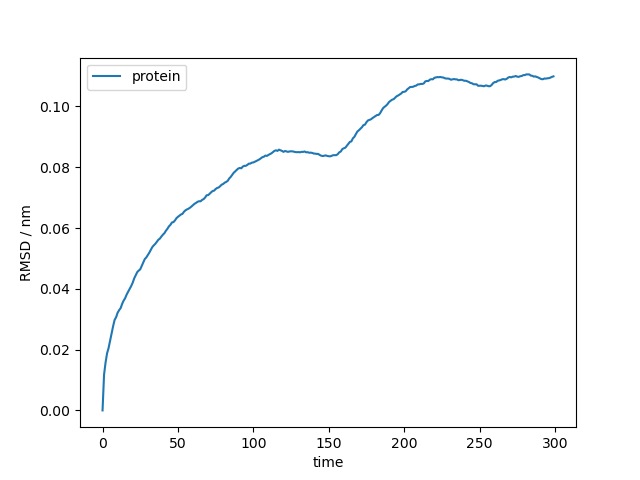

In [12]:
fig_id3 = matches[2]
fig_path3 = registry.get_mapped_path(fig_id3)
assert os.path.exists(fig_path3), f"This figure {fig_id3} does not exist."
Image(filename=fig_path3)

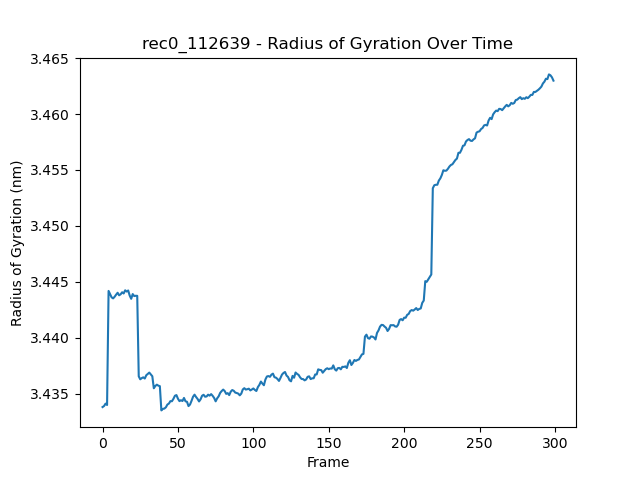

In [13]:
fig_id4 = matches[3]
fig_path4 = registry.get_mapped_path(fig_id4)
assert os.path.exists(fig_path4), f"This figure {fig_id4} does not exist."
Image(filename=fig_path4)

# non-descriptive prompt

In [14]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)

In [15]:
agent_2.run(non_descriptive_prompt_9)

Thought: I'll break this down into steps:
1. First, let's download 1LYZ and get information about its structure and sites
2. Then run simulations at both temperatures
3. Finally analyze the results

Let's start by downloading the PDB file.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that we have the PDB file, let's get information about binding sites and active sites. I'll use GetAllKnownSites to get comprehensive information about the protein's important sites.

Action:
```
{
    "action": "GetAllKnownSites",
    "action_input": {
        "query": "1LYZ",
        "primary_accession": "P00698"
    }
}
```

Thought: Let's analyze the structure first to get information about residues and beta sheets, then set up and run the simulations.

Action:
```
{
    "action": "ComputeDSSP",
    "action_input": {
        "traj_file": "1LYZ_113021",
        "target_frames": "first"
    }
}
```

Thought: Now let's s

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

 Analyze the structure and dynamics



Action:
```
{
  "action

": "PDBFileDownloader",
  

"action_input": "1LYZ

"
}
```


PDB file found with this ID: 1LYZ


Thought: Now

 that I have the P

DB file, I'll

 get information about binding and active sites using

 the Uniprot database

. First, I need to get the

 Uniprot ID for 1LYZ

.

Action:
```
{
    

"action": "GetU

niprotID",
    "action_input

": "1LYZ"
}


```



Thought: Now that

 I have the Uniprot ID, I

'll get information about binding and active sites

 for this protein.

Action:


```
{
    "action": "

GetAllKnownSites

",
    "action_input": {


        "query": "P17897

",
        "primary_acc

ession": "P17897"
    }


}
```



Thought: Let

's analyze the structure and set up the simulations.

 First, I'll check the protein structure details.

Action:


```
{
    "action": "S

ummarizeProteinStructure",
    "

action_input": {
        "t

raj_file": "1LYZ_164

826",
        "top_file": "1

LYZ_164826"
    }
}


```



Thought: Let

's set up and run the simulations at

 both temperatures. I'll start

 with 300K.



Action:
```


{
    "action": "SetUp

andRunFunction",
    "action

_input": {
        "p

db_id": "1LY

Z_164826",
        

"forcefield_files": ["amber14

-all.xml", "amber14/

tip3pfb.xml"],


        "save": true,
        "

system_params": {
            "

nonbondedMethod": "PM

E",
            "nonbondedC

utoff": "1.0 *

 nanometers",
            "constraints": "

HBonds",
            

"rigidWater": true,


            "ewaldErrorTolerance

": 0.0005

,
            "constraintTolerance":

 0.000001,
            "

solvate": true


        },
        "

integrator_params": {
            

"integrator_type": "L

angevinMiddle",
            "Temperature

": "300 * kelvin",
            

"Friction": "1.

0 / picoseconds",


            "Timestep": "0

.002 * picoseconds"
        

},
        "simulation_params": {


            "Ensemble": "NP

T",
            "Number

 of Steps": 500,
            "recor

d_interval_steps": 5

,
            "record_params

": ["step", "potentialEnergy", "

temperature", "density"]
        }
    

}
}
```



Building system...


About to create system...
Attempts at creating system: 0/3


Error adding solvent ValueError – No template found for residue 1 (LYS).  The set of atoms is similar to HID, but it is missing 8 atoms.  For more information, see https://github.com/openmm/openmm/wiki/Frequently-Asked-Questions#template
Residue code: LYS
Residue code not in solvent list. Adding forcefield                         not supported.


Thought: I see the issue. We

 need to clean the PDB file first

 to add missing atoms and handle non

-standard residues before running

 the simulation.

Action:
```


{
    "action": "Clean

ingToolFunction",
    "action

_input": {
        "pdb_

id": "1LYZ_164826",


        "replace_non

standard_residues": true,


        "add_missing_atoms":

 true,
        "remove_het

erogens": true,
        "remove_

water": true,
        "ad

d_hydrogens": true,
        "ad

d_hydrogens_ph": 7.0


    }
}


```



file path: /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_80/pdb/1LYZ_raw_20250110_164826.pdb


Thought: Now that we have a

 cleaned structure, let's try running the simulation at

 300K again.

Action:
```


{
    "action": "SetUp

andRunFunction",
    "action_input

": {
        "pdb_id":

 "1LYZ_164845",


        "forcefield_files": ["amber14

-all.xml", "amber14/tip

3pfb.xml

"],
        "save": true,
        

"system_params": {
            "non

bondedMethod": "PME",


            "nonbondedCutoff":

 "1.0 * nanometers",


            "constraints": "HBonds",


            "rigidWater": true,


            "ewaldErrorTolerance":

 0.0005,
            "constra

intTolerance": 0.000001

,
            "solvate": true


        },
        "integrator_params":

 {
            "integrator_type": "

LangevinMiddle",
            "

Temperature": "300 * kelvin",


            "Friction": "1.0 

/ picoseconds",
            "Timest

ep": "0.002 * picos

econds"
        },
        "simulation_

params": {
            "Ensemble": "

NPT",
            

"Number of Steps":

 500,
            

"record_interval_steps": 5,


            "record_params": ["step",

 "potentialEnergy", "temperature", "

density"]
        }


    }
}
```



Building system...


About to create system...
Attempts at creating system: 0/3


System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2b4169394900> >


KeyError: 'Pressure'

In [16]:
registry = agent_2.path_registry
print("ckpt_dir:",os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

ckpt_dir: ckpt_104
Files found in registry: 1LYZ_113021: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_113021
 rec0_113029: dssp values for trajectory with id: 1LYZ_113021
 1LYZ_113040: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_113045: Initial positions for simulation sim0_113045
 sim0_113045: Basic Simulation of Protein 1LYZ_113040
 rec0_113049: Simulation trajectory for protein 1LYZ_113040 and simulation sim0_113045
 rec1_113049: Simulation state log for protein 1LYZ_113040 and simulation sim0_113045
 rec2_113049: Simulation pdb frames for protein 1LYZ_113040 and simulation sim0_113045
 top_sim0_113315: Initial positions for simulation sim0_113315
 sim0_113315: Basic Simulation of Protein 1LYZ_113040
 rec0_113318: Simulation trajectory for protein 1LYZ_113040 and simulation sim0_113315
 rec1_113318: Simulation state log for protein 1LYZ_113040 and

In [25]:
import re
import os
matches = re.findall(r"rec0_\d+", paths_and_descriptions)
traj_id1 = matches[1]
traj_id2 = matches[2]
traj_path1 = registry.get_mapped_path(traj_id1)
traj_path2 = registry.get_mapped_path(traj_id2)
assert os.path.exists(traj_path1)
assert os.path.exists(traj_path2)

matches = re.findall(r"top_sim0_\d+", paths_and_descriptions)
top_id1 = matches[0]
top_id2 = matches[1]
top_path1 = registry.get_mapped_path(top_id1)
top_path2 = registry.get_mapped_path(top_id2)
assert os.path.exists(top_path1)
assert os.path.exists(top_path2)
print(f"It's asserted that file paths for {traj_id1}, {top_id1}, {traj_id2} and {top_id2} exist")

It's asserted that file paths for rec0_113049, top_sim0_113045, rec0_113318 and top_sim0_113315 exist


In [26]:
# this checks DSSP for the first frame, change to the last frame if needed
import mdtraj as md

print("From first simulation:")
traj_path1 = registry.get_mapped_path(traj_id1)
top_path1 = registry.get_mapped_path(top_id1)
traj = md.load(traj_path1, top=top_path1)[0] # first frame
secondary_structure = md.compute_dssp(traj,simplified=True)[0]
print("Number of residues in total: ",traj.n_residues)
print("Number of chains: ",traj.n_chains)
print("Number of residues in sheets: ",len([i for i in secondary_structure if i == 'E']))
print("Number of residues in helices: ",len([i for i in secondary_structure if i == 'H']))
print("Number of residues in coils: ",len([i for i in secondary_structure if i == 'C']))

From first simulation:
Number of residues in total:  6917
Number of chains:  3
Number of residues in sheets:  12
Number of residues in helices:  54
Number of residues in coils:  63


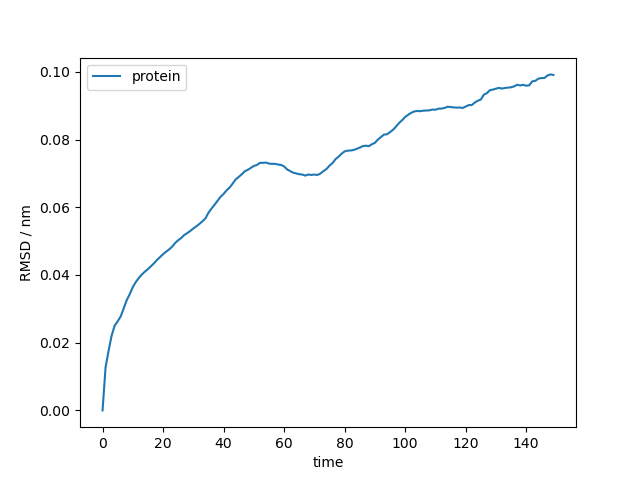

In [27]:
from IPython.display import Image
matches = re.findall(r"fig0_\d+", paths_and_descriptions)
fig_id1 = matches[0]
fig_path1 = registry.get_mapped_path(fig_id1)
assert os.path.exists(fig_path1), f"This figure {fig_id1} does not exist."
Image(filename=fig_path1)

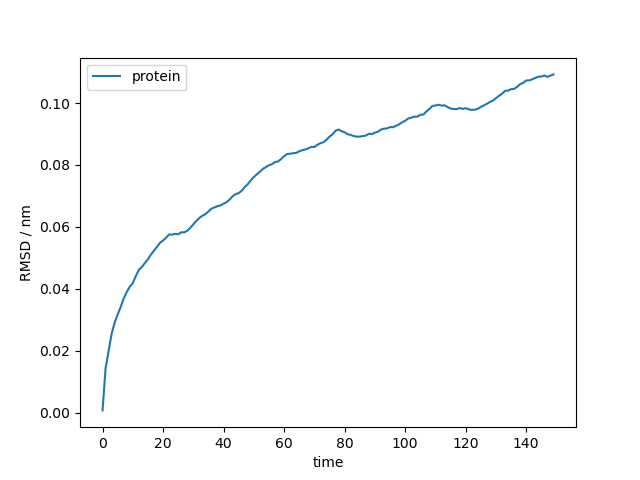

In [28]:
fig_id2 = matches[1]
fig_path2 = registry.get_mapped_path(fig_id2)
assert os.path.exists(fig_path1), f"This figure {fig_id2} does not exist."
Image(filename=fig_path2)

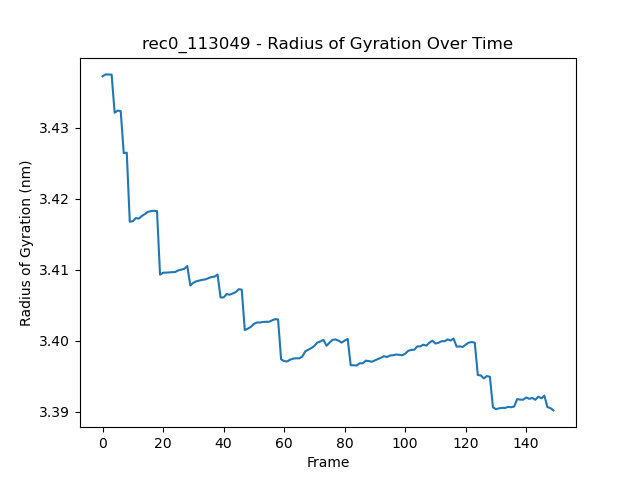

In [29]:
fig_id3 = matches[2]
fig_path3 = registry.get_mapped_path(fig_id3)
assert os.path.exists(fig_path3), f"This figure {fig_id3} does not exist."
Image(filename=fig_path3)

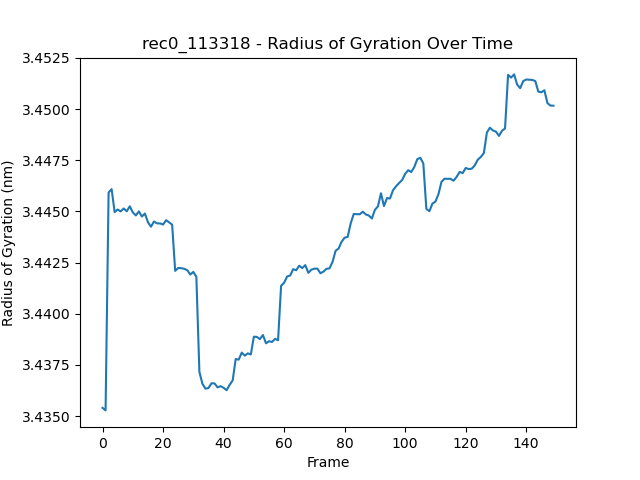

In [30]:
fig_id4 = matches[3]
fig_path4 = registry.get_mapped_path(fig_id4)
assert os.path.exists(fig_path4), f"This figure {fig_id4} does not exist."
Image(filename=fig_path4)